# Cross Validation

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
iris = load_iris()
model = GaussianNB()
score_for_each_fold = cross_val_score(model, iris.data, iris.target, cv = 5) #Cross Validation: 5 fold
#Score_for_each_fold[i] : the accuracy score for the i-th fold
score_for_each_fold

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

# Validation Curve

In [29]:
%%HTML
<style>
b {
    background: teal;
    color : white;
    padding: 3px 5px;
}
</style>
<h2>Plot <b>Train Score</b> and <b>Test Score</b> for different values of a <b>Parameter</b> of a <b>Model</b></h2>

In [21]:
import numpy as np
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
PolynomialRegression().get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'polynomialfeatures', 'linearregression', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [40]:
%xmode plain
from sklearn.model_selection import validation_curve
# validation_curve?
degree_range = range(1,21)
#For each different value of the keyword: degree in PolynomialRegression Model:
#Apply Cross-validation with 5-fold
#train_scores.shape :  (n_ticks, n_cv_folds)
#test_scores.shape: (n_ticks, n_cv_folds)
train_scores, test_scores = validation_curve(PolynomialRegression(), X, y, param_name = 'polynomialfeatures__degree', 
                                             param_range = degree_range, cv = 5)
train_scores, test_scores


Exception reporting mode: Plain


(array([[0.71469019, 0.71586162, 0.76727921, 0.70766539, 0.71499241],
        [0.89413781, 0.88248815, 0.90829697, 0.87972563, 0.90847575],
        [0.92520846, 0.93334   , 0.95899026, 0.91606433, 0.93572634],
        [0.93587084, 0.95074453, 0.96604063, 0.93028939, 0.94435724],
        [0.93915599, 0.95185182, 0.96605692, 0.93089664, 0.94645919],
        [0.94141775, 0.95246147, 0.96773124, 0.93286909, 0.94755474],
        [0.94297978, 0.95302912, 0.96774457, 0.93366267, 0.95200763],
        [0.94298132, 0.95381995, 0.96889269, 0.93369183, 0.95227903],
        [0.94866279, 0.95442657, 0.97067738, 0.93686825, 0.95236701],
        [0.94867303, 0.95638686, 0.97392267, 0.93983835, 0.95528966],
        [0.94918109, 0.9563877 , 0.97394995, 0.94264752, 0.95966939],
        [0.95675049, 0.96287427, 0.97395   , 0.94345827, 0.96035077],
        [0.9589008 , 0.96517089, 0.97628315, 0.94435956, 0.96035174],
        [0.95920027, 0.96605177, 0.97719146, 0.94627095, 0.96038424],
        [0.96019497,

In [46]:
np.mean(train_scores, axis = 1)

array([0.72409776, 0.89462486, 0.93386588, 0.94546053, 0.94688411,
       0.94840686, 0.94988476, 0.95033296, 0.9526004 , 0.95482211,
       0.95636713, 0.95947676, 0.96101323, 0.96181974, 0.96267062,
       0.96322212, 0.96627078, 0.9683352 , 0.97148696, 0.97264165])

In [47]:
np.mean(test_scores, axis = 1)

array([ 6.14449018e-01,  8.44112295e-01,  8.72599891e-01,  8.96521437e-01,
        8.94401674e-01,  8.77009511e-01,  8.72741953e-01,  8.15270485e-01,
        8.65346527e-01, -6.92150223e-01, -1.01775759e+01, -7.91689023e+01,
       -1.76069895e+03, -1.25953870e+03, -2.83310548e+04, -1.21195522e+05,
       -1.69244582e+08, -4.17721448e+08, -6.03661965e+08, -1.38753523e+10])

(0, 1)

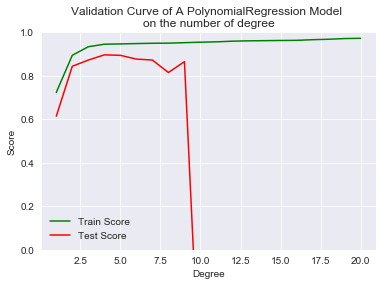

In [54]:
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set_style('darkgrid')

plt.plot(degree_range, np.mean(train_scores, axis = 1), label = 'Train Score', color = 'green')
plt.plot(degree_range, np.mean(test_scores, axis = 1), label = 'Test Score', color = 'red')
plt.legend(frameon = False)
plt.ylabel('Score')
plt.xlabel('Degree')
plt.title('Validation Curve of A PolynomialRegression Model \non the number of degree')
plt.ylim(0, 1)

In [55]:
%%HTML
<h3>Plot The best model: Degree = 3</h3>

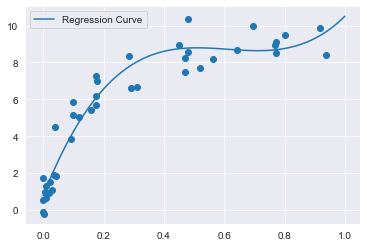

In [57]:
model = PolynomialRegression(3)
plt.scatter(X.ravel(), y)
x_ = np.linspace(0, 1, 100)
model.fit(X, y)
y_pred = model.predict(x_[:, np.newaxis])
plt.plot(x_, y_pred, label = 'Regression Curve')
plt.legend()


# Learning Curve

In [58]:
%%HTML
<h2>Plot <b>train_scores</b> and <b>test_scores</b> of a <b>Model</b> with different <b>Sample Size</b></h2>

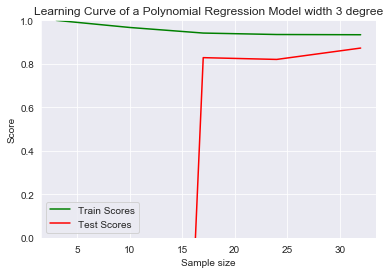

In [64]:
from sklearn.model_selection import learning_curve

#Cross-Validation: 5-fold on each different value of sample size
sizes, train_scores, test_scores = learning_curve(PolynomialRegression(3), X, y, cv = 5)
plt.plot(sizes, np.mean(train_scores, 1), label = 'Train Scores', color = 'green')
plt.plot(sizes, np.mean(test_scores, 1), label = 'Test Scores', color = 'red')
plt.xlabel('Sample size')
plt.ylabel('Score')
plt.title('Learning Curve of a Polynomial Regression Model width 3 degree')
plt.ylim(0,1)
plt.legend()



In [67]:
%%HTML
<h1><b>NOTE</b></h1>
<img src = 'https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-learning-curve.png'/>
<p>In particular, once you have enough points that a particular model has converged,
adding more training data will not help you! T
he only way to increase model performance in this case is to use another (often more complex) model.</P>